In [2]:
from numpy import sin, cos, pi, sqrt, shape, linspace, meshgrid, zeros
from math import factorial
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mp3d
from IPython.display import display
from PIL import Image

# Spherical Harmonics


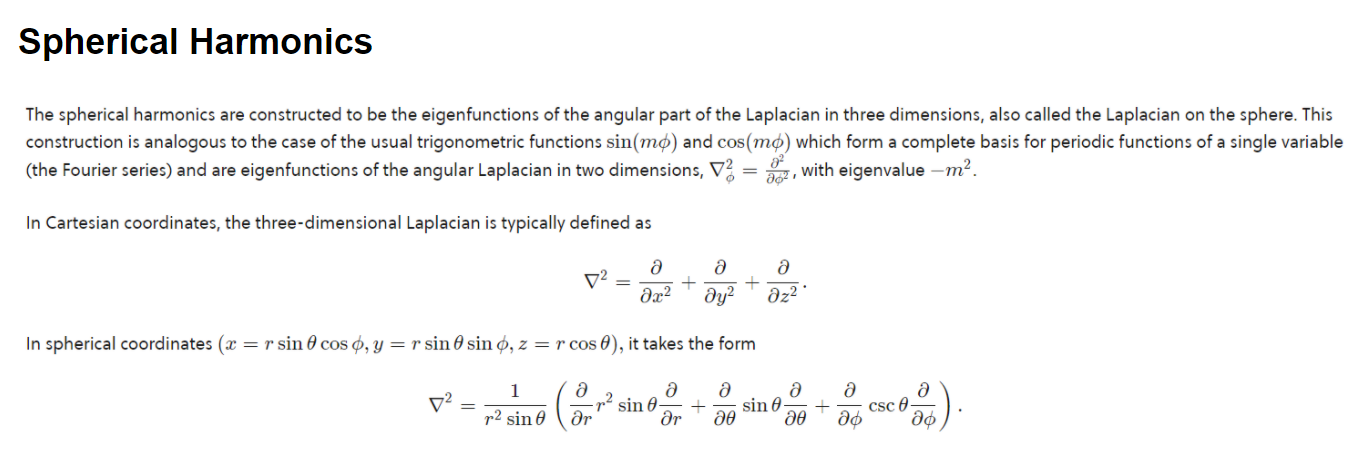

In [20]:
Image(r'C:\Users\ferna\Jupyter_Notebook\Spherical_Harmonics\Image1.png')

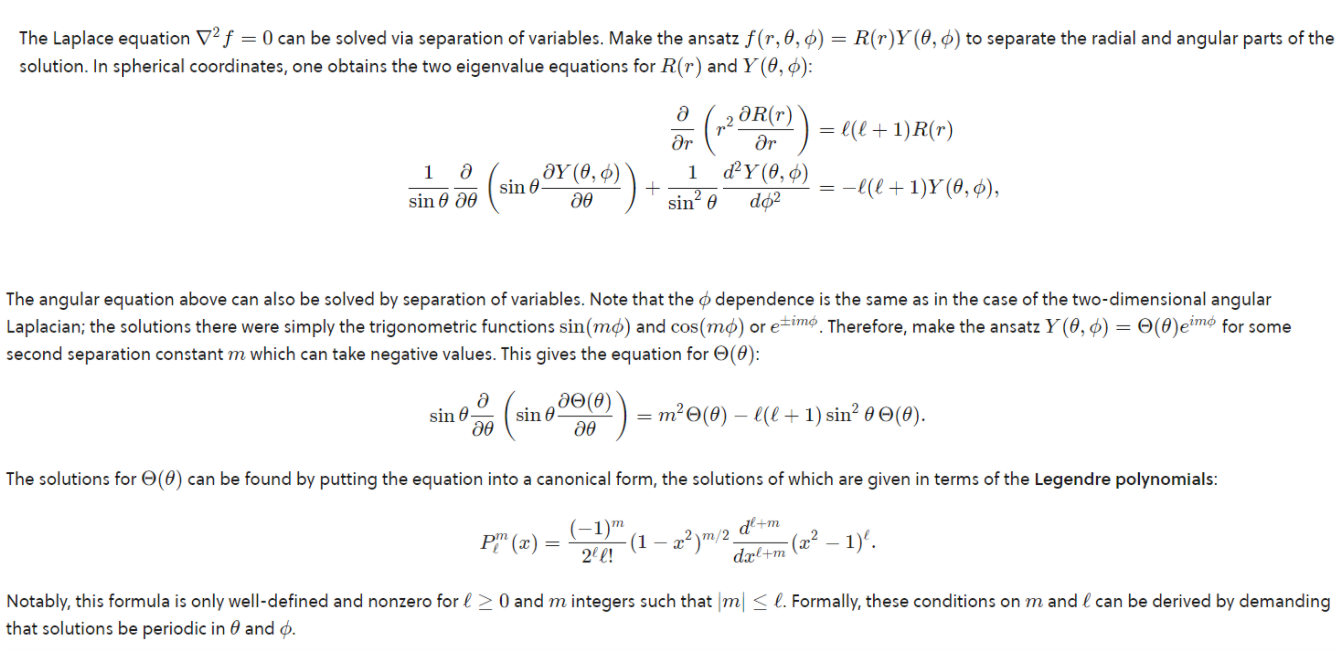

In [21]:
Image(r'C:\Users\ferna\Jupyter_Notebook\Spherical_Harmonics\Image2.png')

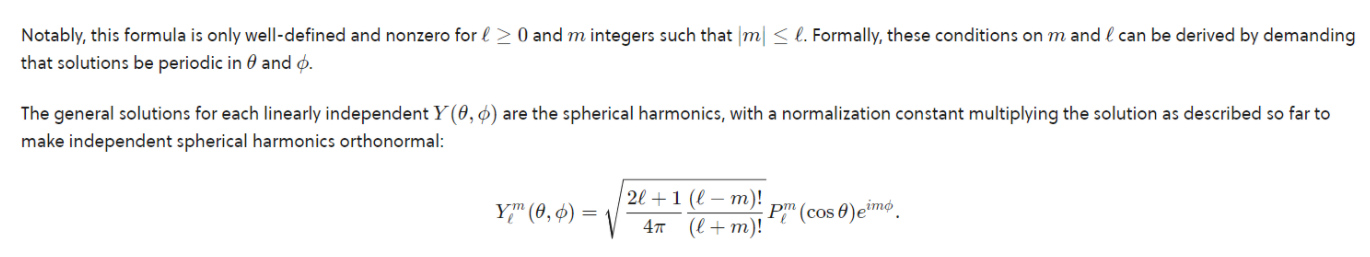

In [22]:
Image(r'C:\Users\ferna\Jupyter_Notebook\Spherical_Harmonics\Image3.png')

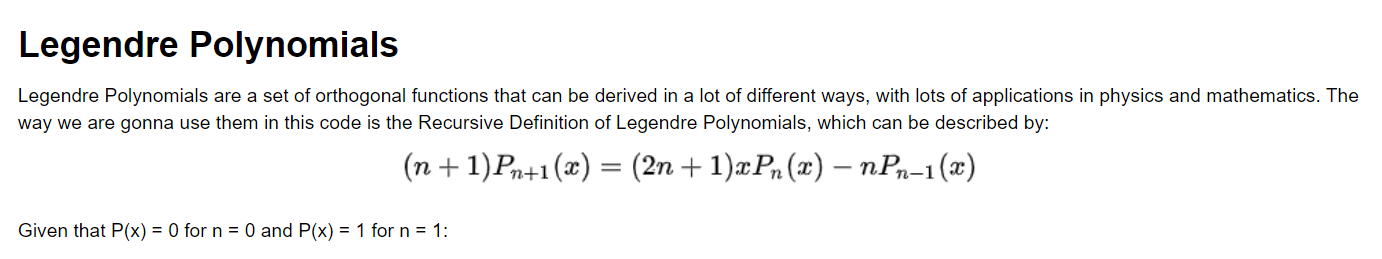

In [23]:
Image(r'C:\Users\ferna\Jupyter_Notebook\Spherical_Harmonics\Image4.png')

In [5]:
def legendre_polynomial(n,x):
    if n == 0:
        P = 1
    
    elif n == 1:
        P = x
        
    else: 
        P = (1/n) * ((2*n - 1) * x * legendre_polynomial(n-1, x) - (n-1) * legendre_polynomial(n-2, x))
        
    return P

# Associated Legendre Polynomials

The associated polynomials are the canonical solutions of the general Legendre Equation. They now have two more parameters, l and m, called degree and order of the associated polynomial. Similarly to the regular polynomial, the associated also have a recursive form of defining, which we will use here. 

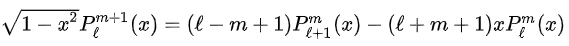

In [6]:
def associated_legendre(l, m ,x):
    try:
        if m == 0:
            P = legendre_polynomial(l,x)
            
        elif m > 0:
            P = (1/sqrt(1-x**2)) * ((l-m+1)*x*associated_legendre(l,m-1,x)
                                   - (l+m-1)*associated_legendre(l-1,m-1,x))
        elif m < 0:
            m = abs(m)
            P = ((-1)**m) * (factorial(l-m)/factorial(l+m))*associated_legendre(l,m,x)
            
    except ZeroDivisionError: 
        P = 0
        
    return P

Since our parameters l and m cannot be arbitrary, we need to do a little "consistency" test before performing the calculations and plotting to make sure the parameters satisfy the conditions that l > 0 and |m| is no bigger than l. Also, due to computational expenses, it's a good idea to keep these values relatively low, smaller than 10. 

We also need to compute the normalization factor, which is a function of m and l.

In [7]:
#Inputs of parameters l and m
l = int(input('Degree "l": '))
if l < 0:
    print('"l" can not be a negative number')

m = int(input('Order "m": '))
if m > l or m < (-l):
    print('Order "m" must belong to "[-l,l]"')

#Normalization constant

K = sqrt( ((2*l + 1)* factorial(l - abs(m)))/ (4* pi* factorial(l + abs(m))) )

Degree "l": 4
Order "m": 0


In [8]:
phi = linspace(0, 2* pi, 100)
tht = linspace(0, pi, 100)

Phi, Tht = meshgrid(phi, tht)

p, q = shape(Phi)
Y    = zeros([p, q])

for i in range(0+1, p-1):
    for j in range(0+1, q-1):

        if m > 0:
        
            Y[i, j] = sqrt(2) * K * cos(m * Phi[i, j]) * associated_legendre(l, m, cos(Tht[i, j]))
        
        elif m < 0:
        
            Y[i, j] = sqrt(2) * K * sin(abs(m) * Phi[i, j]) * associated_legendre(l, abs(m), cos(Tht[i, j]))
        
        else:
        
            Y[i, j] = K * associated_legendre(l, 0, cos(Tht[i, j]))

p, q = shape(Y)

# Using Spherical Coordinates

Representing spherical regions with cartesian coordinates usually is extremely complicated and hard to deal with. By using Spherical Coordinates, we can manipulate the functions easily, and it's reasonably simple going from one set of coordinates to another. What we usually do is making all calculations in spherical coordinates, and then transforming the solutions back into cartesian coords. Since the definition of spherical harmonics is in the spherical world, we should then create a function to go back to cartesian coordinates, and then plotting it. 

In [9]:
def Shperical2Cartesian(r, theta, phi):

    x = r* sin(theta)* cos(phi)
    y = r* sin(theta)* sin(phi)
    z = r* cos(theta)
    
    return x, y, z

In [10]:
x, y, z = Shperical2Cartesian(abs(Y), Tht, Phi)

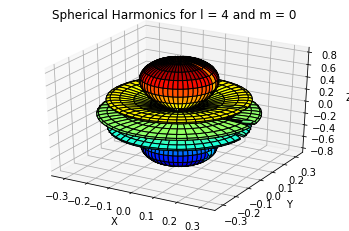

In [11]:
fig = plt.figure('Harmonics')
ax = fig.add_subplot( 111 , projection='3d')

ax.plot_surface(x, y, z, cmap = 'jet', edgecolor = 'k')

plt.title('Spherical Harmonics for l = %d and m = %d' % (l, m))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()